### <p style="text-align: right;"> &#9989; Dylan Primeau</p>
### <p style="text-align: right;"> &#9989; primeaud</p>

# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [6]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Scandinavia': ['Iceland', 'Ukraine', 'Northern Europe'],
        'Ukraine': ['Scandinavia', 'Ural', 'Afghanistan', 'Middle East', 'Southern Europe', 'Northern Europe'],
        'Great Britain': ['Iceland', 'Western Europe', 'Northern Europe', 'Scandinavia'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Southern Europe', 'Western Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Middle East', 'Egypt', 'North Africa']
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Irkutsk', 'Siberia', 'China', 'Japan', 'Kamchatka'],
        'Japan': ['Mongolia', 'Kamchatka'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'China': ['Afghanistan', 'Ural', 'Siberia', 'Mongolia', 'India', 'Siam'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Afghanistan', 'India', 'East Africa', 'Egypt'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Eastern Australia', 'Western Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [10]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here
    G = nx.Graph()

    for continent, terr_dict in territories.items():
        for territory, neighbors in terr_dict.items():
            G.add_node(territory, continent=continent)

            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    return G

# Create the graph
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Available layouts: spring, circular, kamada_kawai, random, shell


Enter a layout type from the list above:  kamada_kawai


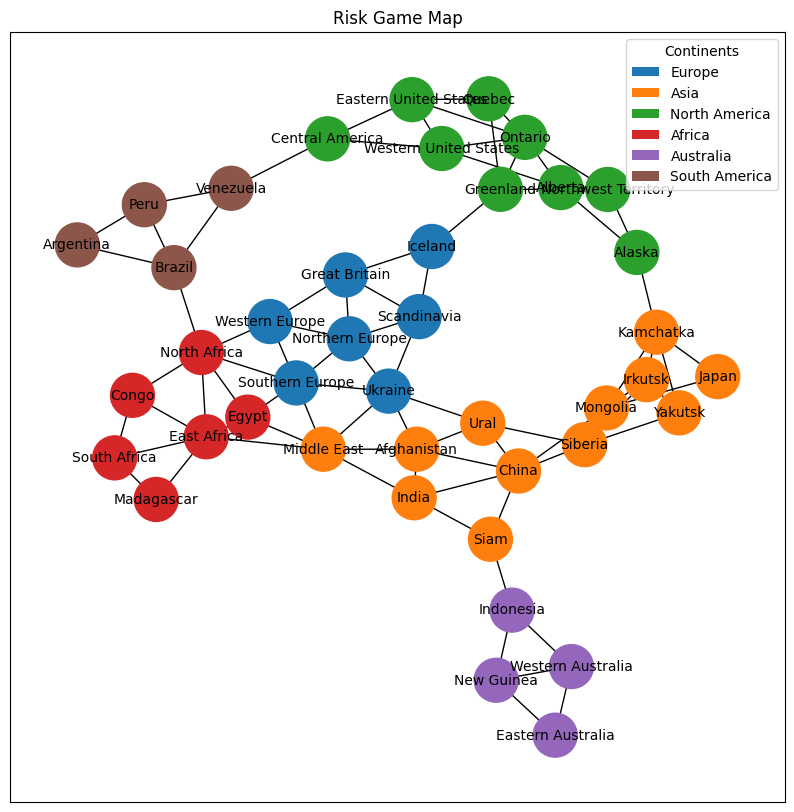

In [37]:
def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Your code here
    # Allowing userr toi choose between 5 ypes of layouts that i foudn online
    layout_options = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout
    }

    # Ask user for layout chuice
    print("Available layouts: spring, circular, kamada_kawai, random, shell")
    layout_choice = input("Enter a layout type from the list above: ").strip().lower()

    # Use spring layout by default
    layout_func = layout_options.get(layout_choice, nx.spring_layout)
    pos = layout_func(G)

    # Assign up to 10 colors to continents 
    continent_colors = {}
    unique_continents = list(set(nx.get_node_attributes(G, 'continent').values()))
    color_palette = plt.get_cmap('tab10')  

    for i, continent in enumerate(unique_continents):
        continent_colors[continent] = color_palette(i)

    # Build list of node colors based on continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]

    # Plotting
    plt.figure(figsize=(10, 10))  
    # Drawing nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
    # Drawing edges
    nx.draw_networkx_edges(G, pos)
    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    # Create a legend for continents
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=continent_colors[c], label=c) for c in unique_continents]
    plt.legend(handles=legend_elements, title="Continents", loc="best")
    plt.title("Risk Game Map")
# Visualize the graph
visualize_risk_graph(G)


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ The kamada_kawai layout provides the best visualization of continent based clustering in the risk board graph. This layout spreads out the nodes while maintaining balanced edge lengths which helps group territories from the same continent closer together, making the visual clusters easier / disgestibnle for identificastion. The rationale behind choosing this layout is that it models the layout as a system of springs, trying to minimize energy in the graph. It positions nodes in a way that connected nodes are kept close and spacing is relatively similar. This naturally results in visible clusters for each continent. This is especially useful for the risk map, where geographybased groupings matter. The other layouts made for difficult visibiklity...

According to NetworkX documentation, the Kamada-Kawai layout is a force directed algorithm that attempts to position nodes so that the geom distance between them is close to the graphtheoretic distance  of number of edges in the shortest path. This helps preserve relative relationships between nodes. The websie I used was: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html

The part of the code that assigns colors to each node based on its continent is below. It assigns each unique continent a color using the tab10 colormap and applies that color to the nodes in that continent:

continent_colors = {}
unique_continents = list(set(nx.get_node_attributes(G, 'continent').values()))
color_palette = plt.get_cmap('tab10')  
for i, continent in enumerate(unique_continents):
    continent_colors[continent] = color_palette(i)
node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]

I created the legend with the following code. This part is not obvious because it uses Patch from matplotlib to manually create colored legend entries for each continent
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=continent_colors[c], label=c) for c in unique_continents]
plt.legend(handles=legend_elements, title="Continents", loc="best")


I built the colormap using tab10. The matplotlib colormap provides up to 10 different colorblind colors
color_palette = plt.get_cmap('tab10')

I set the node and font size using nx.draw. The node_size=1000 increases the default size, and font_size=10 increases the readability of the labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

I printed the labels for the nodes using nx.draw.This function maps each node to its name and places the text at the node's position in the visualization:
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')






---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University